In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.metrics import (mean_absolute_error, r2_score, mean_squared_error, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay)

from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('data/ClientsData.csv')
df.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
0,49,1,0,1,2,1,5000.0,1,1,2,0
1,32,1,0,1,3,3,12000.0,1,1,1,0
2,52,1,0,1,4,0,9000.0,2,1,0,0
3,39,1,0,1,1,1,25000.0,1,1,3,0
4,30,1,0,0,0,0,12000.0,2,1,2,0


Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.

Создайте модель линейной регрессии, которая бы оценивала лояльность пользователей к отклику.

### Пояснения к признакам набора данных:
* `AGREEMENT_RK` — `уникальный идентификатор объекта в выборке;`
* `TARGET` — `целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);`
* `AGE` — `возраст клиента;`
* `SOCSTATUS_WORK_FL` — `социальный статус клиента относительно работы (1 — работает, 0 — не работает);`
* `SOCSTATUS_PENS_FL` — `социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);`
* `GENDER` — `пол клиента (1 — мужчина, 0 — женщина);`
* `CHILD_TOTAL` — `количество детей клиента;`
* `DEPENDANTS` — `количество иждивенцев клиента;`
* `PERSONAL_INCOME` — `личный доход клиента (в рублях);`
* `LOAN_NUM_TOTAL` — `количество ссуд клиента;`
* `LOAN_NUM_CLOSED` — `количество погашенных ссуд клиента`.

In [3]:
df.describe()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
count,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000
mean,40.406096,0.909610,0.134468,0.654536,1.099389,0.645208,13853.836323,1.387769,0.751889,0.195362,0.119030
std,11.601068,0.286748,0.341165,0.475535,0.995411,0.812252,9015.467617,0.793566,0.988499,0.685022,0.323835
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,1.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,0.000000,1.000000,1.000000,0.000000,12000.000000,1.000000,0.000000,0.000000,0.000000
75%,50.000000,1.000000,0.000000,1.000000,2.000000,1.000000,17000.000000,2.000000,1.000000,0.000000,0.000000
max,67.000000,1.000000,1.000000,1.000000,10.000000,7.000000,250000.000000,11.000000,11.000000,13.000000,1.000000


In [4]:
df.shape

(15223, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                15223 non-null  int64  
 1   SOCSTATUS_WORK_FL  15223 non-null  int64  
 2   SOCSTATUS_PENS_FL  15223 non-null  int64  
 3   GENDER             15223 non-null  int64  
 4   CHILD_TOTAL        15223 non-null  int64  
 5   DEPENDANTS         15223 non-null  int64  
 6   PERSONAL_INCOME    15223 non-null  float64
 7   LOAN_NUM_TOTAL     15223 non-null  int64  
 8   LOAN_NUM_CLOSED    15223 non-null  int64  
 9   LOAN_DLQ_NUM       15223 non-null  int64  
 10  TARGET             15223 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.3 MB


In [6]:
df.isna().sum()

AGE                  0
SOCSTATUS_WORK_FL    0
SOCSTATUS_PENS_FL    0
GENDER               0
CHILD_TOTAL          0
DEPENDANTS           0
PERSONAL_INCOME      0
LOAN_NUM_TOTAL       0
LOAN_NUM_CLOSED      0
LOAN_DLQ_NUM         0
TARGET               0
dtype: int64

In [7]:
df.duplicated().sum()

2819

In [8]:
df = df.drop_duplicates()

In [9]:
df['TARGET'].value_counts()

TARGET
0    10695
1     1709
Name: count, dtype: int64

In [10]:
# Дисбаланс класов, следует учитывать при построении модели

/tmp/ipykernel_15662/174292600.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['PERSONAL_INCOME'], shade=True, legend=False)
/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


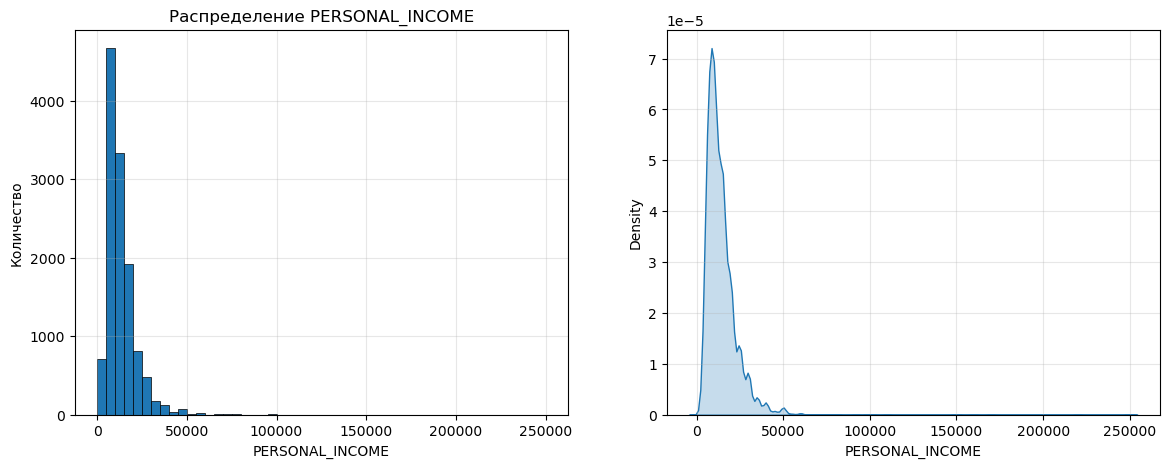

Есть небольшая группа, которая зарабатывает больше всех


In [11]:
plt.figure(figsize=(14,5))
plt.subplot(121)
df['PERSONAL_INCOME'].hist(density=False, bins=50, linewidth=0.5, edgecolor='k')
plt.title('Распределение PERSONAL_INCOME')
plt.ylabel('Количество')
plt.xlabel('PERSONAL_INCOME')
plt.grid(alpha=0.3)
plt.subplot(122)
sns.kdeplot(df['PERSONAL_INCOME'], shade=True, legend=False)
plt.xlabel('PERSONAL_INCOME')
plt.grid(alpha=0.3)

plt.show()
print('Есть небольшая группа, которая зарабатывает больше всех')

In [12]:
df[df['PERSONAL_INCOME'] > 100000]

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
144,56,1,0,1,0,0,170000.0,1,1,1,0
2645,25,1,0,0,1,2,150000.0,1,1,0,0
2726,53,1,0,0,2,0,250000.0,1,0,0,0
6276,49,1,0,0,1,2,220000.0,1,0,0,0
7273,22,1,1,0,0,0,250000.0,1,0,0,0
7494,31,1,0,0,1,1,110000.0,1,0,0,0
11374,52,0,1,1,0,0,160000.0,2,2,0,0
11805,25,1,0,1,1,1,150000.0,1,0,0,1


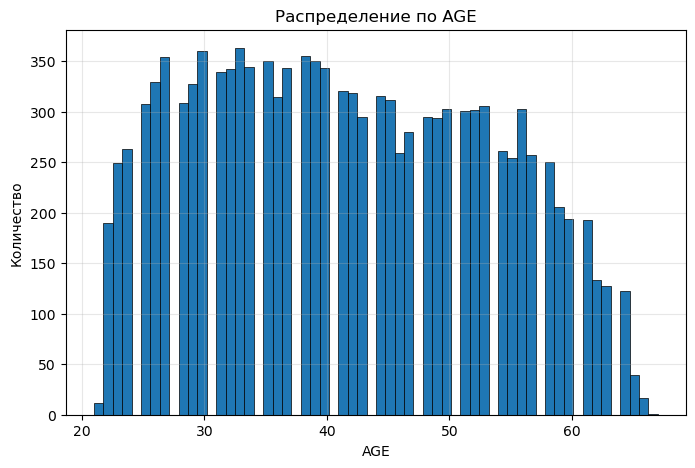

In [13]:
plt.figure(figsize=(8,5))
df['AGE'].hist(density=False, bins=60, linewidth=0.5, edgecolor='k')
plt.title('Распределение по AGE')
plt.ylabel('Количество')
plt.xlabel('AGE')
plt.grid(alpha=0.3)

plt.show()

### Построим матрицу корреляции для выявления линейной зависимоти

In [14]:
# подготовим признаки
df_corr = df

In [15]:
corr_matrix = df_corr.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0

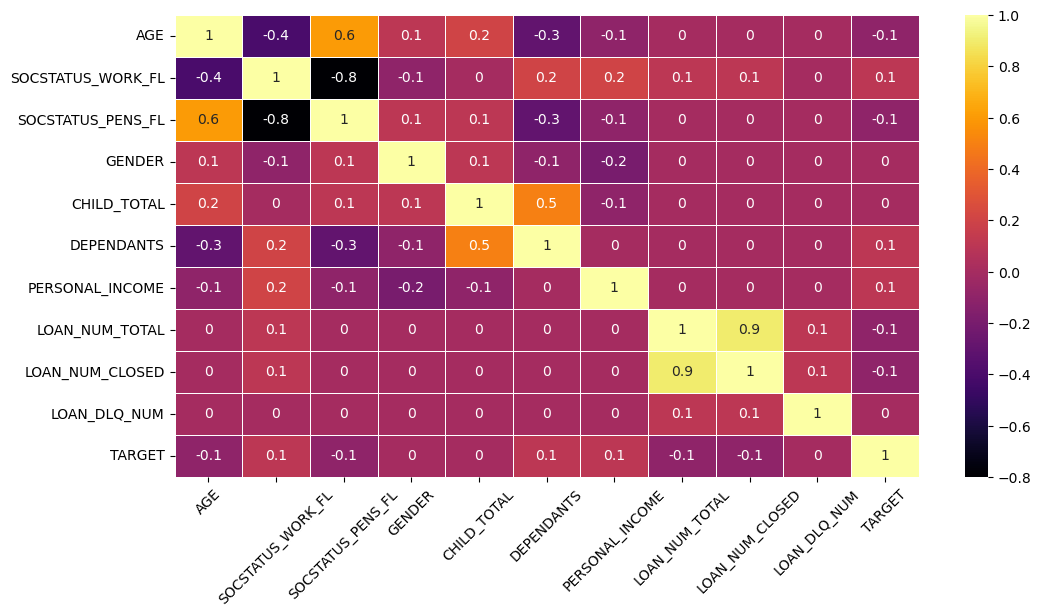

In [16]:
plt.figure(figsize=(12, 6))

sns.heatmap(corr_matrix, annot=True, linewidths=0.7, cmap='inferno')
plt.xticks(rotation=45)
#plt.yticks(rotation=35)
plt.show()

### Построение модели

In [17]:
X = df.drop(['TARGET'], axis=1)
Y = df['TARGET']

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [18]:
model_log_r = LogisticRegression(class_weight={0:1, 1:5.1}).fit(X_train, y_train)

pred_train = model_log_r.predict(X_train)
pred_test = model_log_r.predict(X_test)

In [19]:
print('TRAIN')
print(classification_report(pred_train, y_train))

TRAIN
              precision    recall  f1-score   support

           0       0.70      0.90      0.79      5848
           1       0.51      0.22      0.31      2834

    accuracy                           0.68      8682
   macro avg       0.61      0.56      0.55      8682
weighted avg       0.64      0.68      0.63      8682



In [20]:
print('TEST')
print(classification_report(pred_test, y_test))

TEST
              precision    recall  f1-score   support

           0       0.71      0.90      0.79      2510
           1       0.53      0.22      0.31      1212

    accuracy                           0.68      3722
   macro avg       0.62      0.56      0.55      3722
weighted avg       0.65      0.68      0.64      3722



In [21]:
# Модель немлохо определяет 0 класс и очень плохо 1 класс, балансировка улучшила результаты, но на достаточно большой выборке модель училась на одинаковых наблюдениях.
# Можно попробовать более сложные модели, а также создать новые признаки